file immagini:

colonna: emozione faccia umana

pixels: tanti numeri separati da blank: 48*48 pixel in scala di grigi

leggo file-> 2 array: un array di emozioni

array di immagini: ogni elemento è una matrice

per ogni emozione sorteggia un'immagine a caso e la disegna:

7 emozioni:

- 0, rabbia

- 1, disgusto

- 2, paura

- 3, felice

- 4, triste

- 5, sorpresa

- 6, neutro


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [18]:
file=open("./fer2013.csv")
righe=file.readlines()
file.close()
righe=righe[1:400]
emozioni=[]
facce=[]
for riga in righe:
    riga=riga.split(",")
    emozioni.append(int(riga[0]))
    immagine=riga[1].split(" ")
    facce.append(np.array(immagine).reshape(48, 48))
                    


In [19]:
array_emozioni=np.array(emozioni)
array_facce=np.array(facce, dtype=np.float32)
array_facce[1]/255
np.where(array_emozioni==1)


(array([299, 388], dtype=int64),)

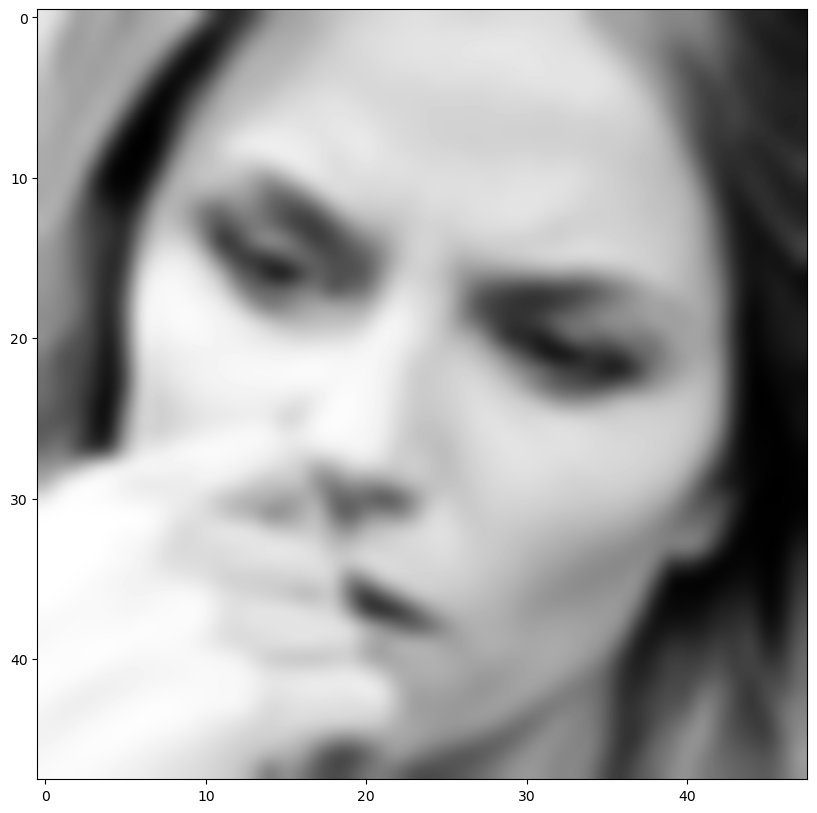

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
immagine=array_facce[1]
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'bicubic'

# Imposta la dimensione della figura in base alle dimensioni reali dell'immagine

# Visualizza l'immagine
ax.imshow(array_facce[2]/255, origin="upper")

plt.show()


In [21]:
emozioni_immagini={}
dim=int(array_emozioni.size)
while len(emozioni_immagini)<7:
    indice=random.randint(0, dim-1)
    if int(array_emozioni[indice]) not in emozioni_immagini:
        emozioni_immagini[int(array_emozioni[indice])]=indice

        
        
emozioni_immagini

{0: 323, 4: 281, 3: 214, 2: 48, 5: 199, 6: 253, 1: 299}

In [24]:
def mostra_immagini(array_immagini, indici_immagini, titoli_imagini):
    fig, axs = plt.subplots(nrows=len(indici_immagini), ncols=1, figsize=(20, 20))
    #ordina il dizionario
    emozioni_immagini=dizionario_ordinato = dict(sorted(indici_immagini.items()))

    '''
    alternativa:
     lista_chiavi=[]
         for chiave in diz.keys():
             lista_chiavi.append(chiave)
         lista_chiavi.sort()
         nuovo_diz={}
        for chiave, indice in zip(diz.keys(),lista_chiavi):
            nuovo_diz[indice]=diz[chiave]
    '''
    for i, indice in indici_immagini.items():
        axs[i].imshow(array_immagini[indice], cmap="Greys_r")
        axs[i].set_title(titoli_imagini[i])
        axs[i].axis("off")
        
    plt.subplots_adjust(hspace=0.5, wspace=0)


    plt.show()

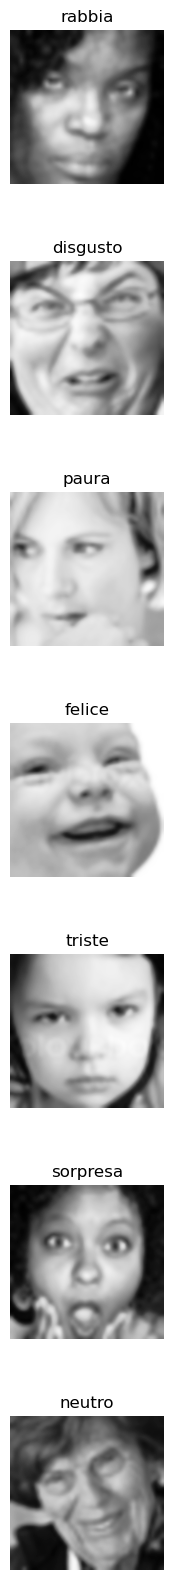

In [25]:
titoli_immagini=["rabbia", "disgusto", "paura" ,"felice", "triste", "sorpresa" , "neutro"]

mostra_immagini(array_facce, emozioni_immagini, titoli_immagini)